In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt 
import os


In [3]:
def load_dat(path, verbose=False):
    """
    Load a .dat file into a pandas DataFrame, handling comment lines and extracting column names
    from the last commented line.
    
    Parameters:
    - path: Path to the .dat file.
    
    Returns:
    - df: pandas DataFrame containing the data.
    """
    # Read the file line by line to handle comments and column names
    with open(path, 'r') as file:
        lines = file.readlines()
    
    # Extract column names from the last line starting with '#'
    coments = [line for line in lines if line.startswith('#')]
    column_line = [line for line in lines if line.startswith('#')][-1]
    column_names = column_line.strip('#').strip().split()

    # Read the data, skipping all comment lines
    df = pd.read_csv(
        path,
        comment='#',           # Ignores all lines that begin with '#'
        delim_whitespace=True, # Split columns by whitespace
        header=None,           # No header row in the data portion
        names=column_names     # Assign column names from the last '#'
    )
    
    if verbose:
        for i in coments:
            print(i)
    return df

In [4]:
# File path to the data file (replace 'file.dat' with your file name)
file_path = "./coefficientNew.dat"

# Step 1: Skip the header lines and read column names
with open(file_path, 'r') as f:
    lines = f.readlines()

# Find the index of the row where the column names start
header_line = None
for i, line in enumerate(lines):
    if line.strip().startswith("# Time"):
        header_line = i
        break

if header_line is None:
    raise ValueError("Header row with column names not found.")

# Extract column names (remove leading '#')
columns = lines[header_line].strip("# \n").split()

# Step 2: Load the data into a DataFrame, skipping all lines before the column names
df = pd.read_csv(
    file_path,
    delim_whitespace=True,  # Columns are separated by whitespace
    skiprows=header_line + 1,  # Skip rows up to and including the header row
    names=columns  # Use extracted column names
)

# Display the DataFrame

df


,Time,Cd,Cd(f),Cd(r),Cl,Cl(f),Cl(r),CmPitch,CmRoll,CmYaw,Cs,Cs(f),Cs(r)
0,1,63.755554,31.878750,31.876803,-0.061553,0.027264,-0.088817,0.058041,0.000973,0.041680,0.067554,0.075457,-0.007903
1,2,79.463102,39.732400,39.730702,-0.040141,0.015419,-0.055560,0.035489,0.000849,0.040771,0.074344,0.077943,-0.003599
2,3,52.058988,26.030015,26.028973,0.000644,-0.003470,0.004114,-0.003792,0.000521,0.023845,0.047656,0.047673,-0.000017
3,4,11.485923,5.743098,5.742825,0.034194,-0.017802,0.051997,-0.034899,0.000136,0.003876,0.011626,0.009689,0.001937
4,5,-18.789986,-9.395107,-9.394879,0.042943,-0.020306,0.063249,-0.041777,-0.000114,-0.009006,-0.014202,-0.016107,0.001905
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,1455,0.379691,0.189942,0.189749,0.000499,-0.000241,0.000740,-0.000491,0.000096,0.002740,0.002817,0.004148,-0.001331
1455,1456,0.379659,0.189926,0.189733,0.000497,-0.000240,0.000737,-0.000489,0.000096,0.002740,0.002817,0.004149,-0.001331
1456,1457,0.379640,0.189916,0.189724,0.000493,-0.000238,0.000732,-0.000485,0.000096,0.002740,0.002817,0.004149,-0.001331
1457,1458,0.379598,0.189895,0.189703,0.000494,-0.000239,0.000732,-0.000485,0.000096,0.002740,0.002817,0.004149,-0.001331


In [1]:
%pwd

'/home/dara/Professional/projects/spaceConcordia/analytics'

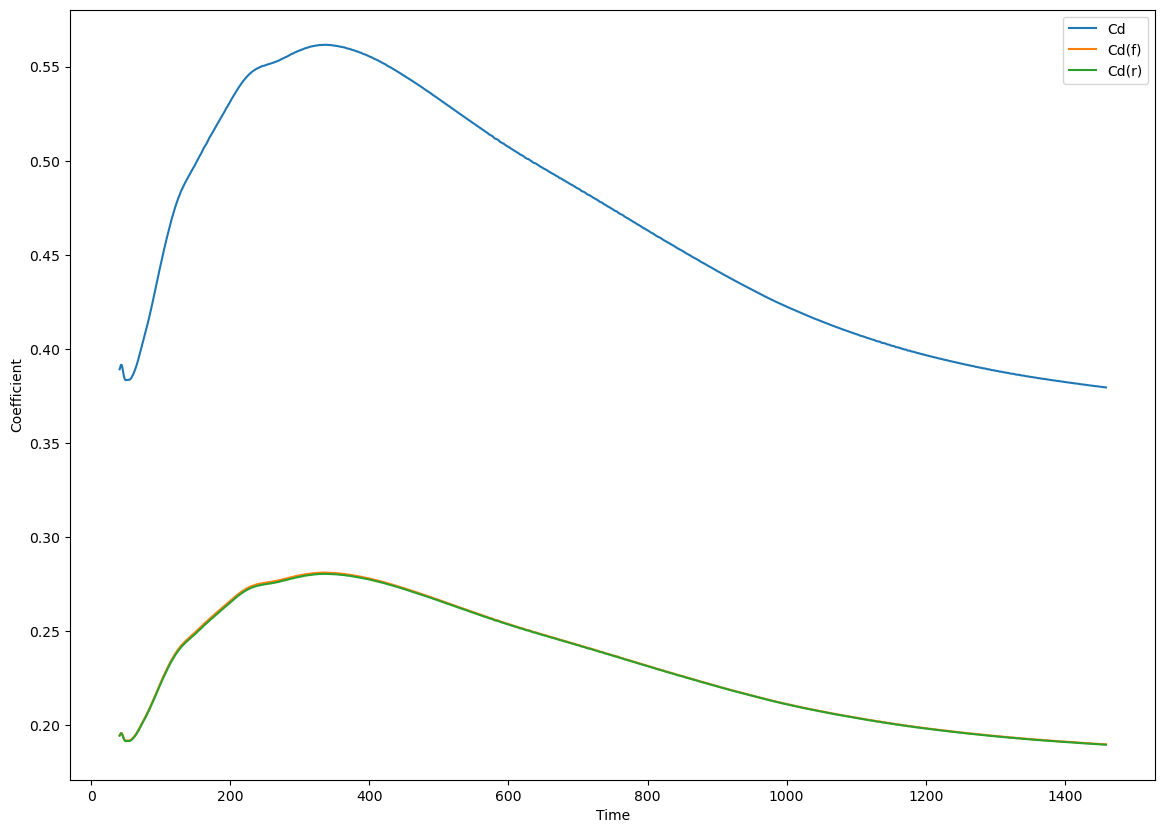

In [6]:
skip = 40

plt.figure(figsize=(14, 10))

for column in df.columns:
    if "Cd" in column:
        plt.plot(df['Time'][skip:], df[column][skip:], label=column)

plt.xlabel('Time')
plt.ylabel('Coefficient')
plt.legend()

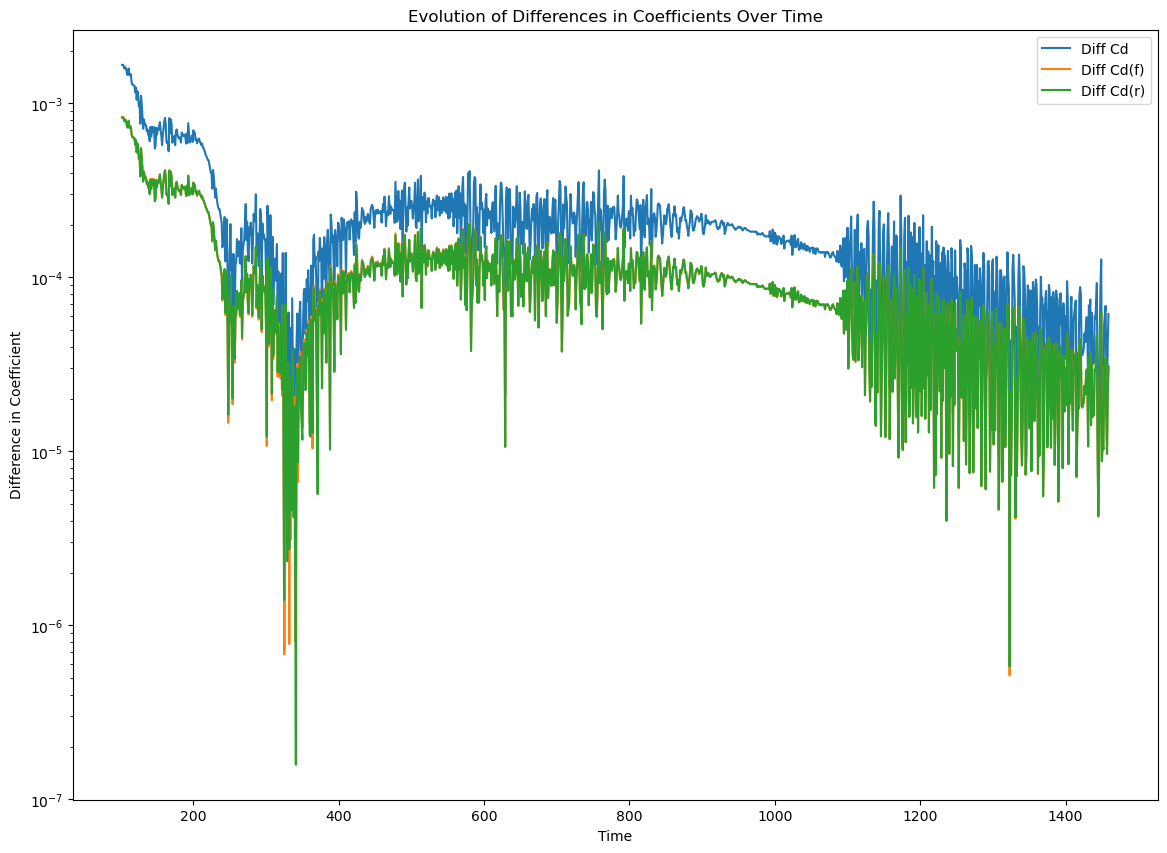

In [12]:
skip = 100

# Calculate the difference for each "Cd" column
plt.figure(figsize=(14, 10))
for column in df.columns:
    if "Cd" in column:
        diff_values = np.abs(np.diff(df[column][skip:]))
        plt.plot(df['Time'][skip+1:], diff_values, label=f"Diff {column}")

plt.xlabel('Time')
plt.ylabel('Difference in Coefficient')
plt.legend()
plt.yscale('log')
plt.title('Evolution of Differences in Coefficients Over Time')
plt.show()

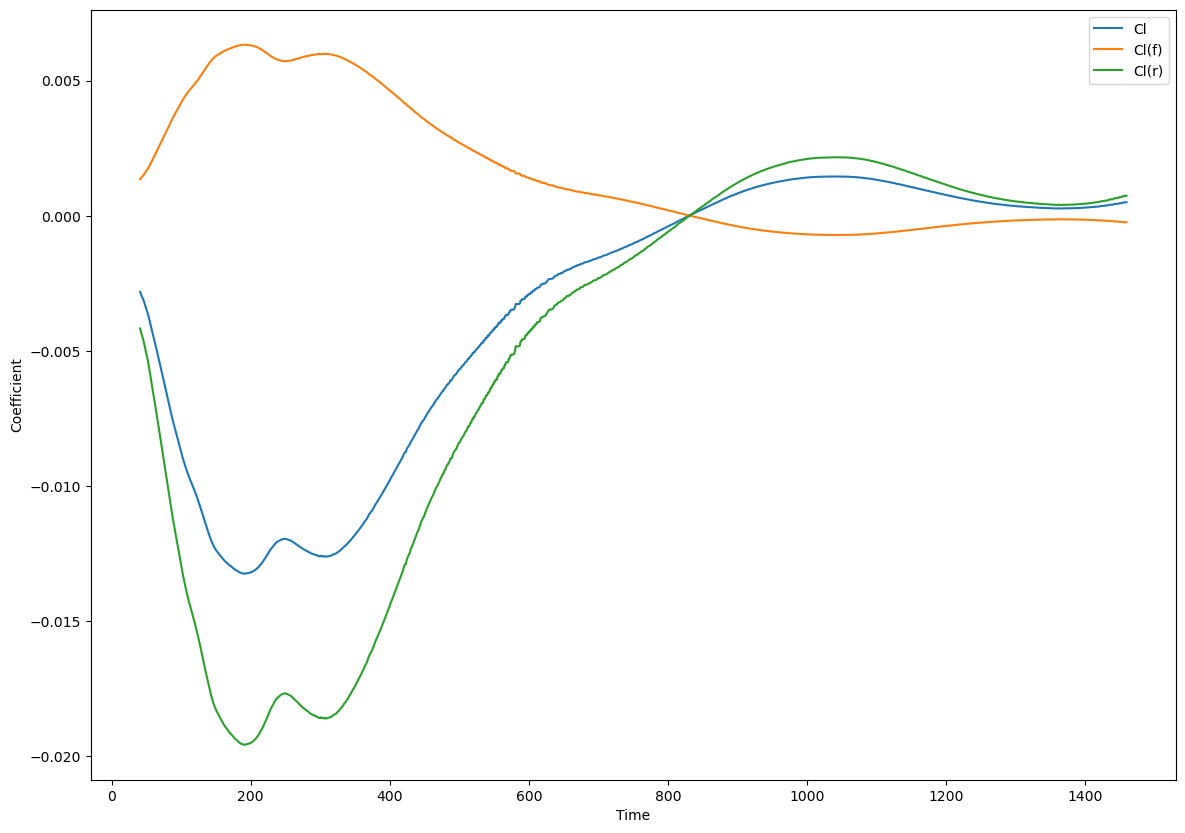

In [8]:
skip=40

plt.figure(figsize=(14, 10))

for column in df.columns:
    if "Cl" in column:
        plt.plot(df['Time'][skip:], df[column][skip:], label=column)

plt.xlabel('Time')
plt.ylabel('Coefficient')
plt.legend()

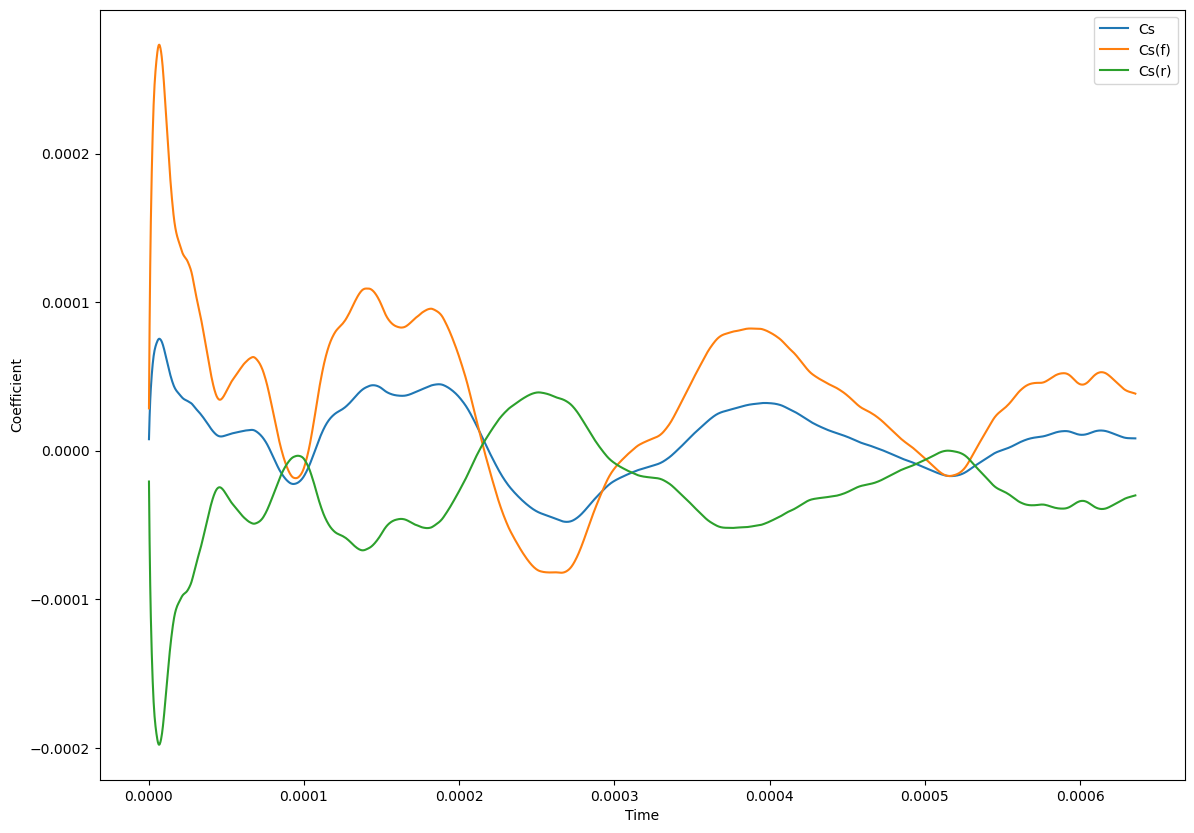

In [27]:
plt.figure(figsize=(14, 10))

for column in df.columns:
    if "Cs" in column:
        plt.plot(df['Time'], df[column], label=column)

plt.xlabel('Time')
plt.ylabel('Coefficient')
plt.legend()

# V2

In [2]:
def dat2df(file_path):
    # Step 1: Skip the header lines and read column names
    with open(file_path, 'r') as f:
        lines = f.readlines()

    # Find the index of the row where the column names start
    header_line = None
    for i, line in enumerate(lines):
        if line.strip().startswith("# Time"):
            header_line = i
            break

    if header_line is None:
        raise ValueError("Header row with column names not found.")

    # Extract column names (remove leading '#')
    columns = lines[header_line].strip("# \n").split()

    # Step 2: Load the data into a DataFrame, skipping all lines before the column names
    df = pd.read_csv(
        file_path,
        delim_whitespace=True,  # Columns are separated by whitespace
        skiprows=header_line + 1,  # Skip rows up to and including the header row
        names=columns  # Use extracted column names
    )

    return df

In [5]:
df1 = dat2df("./dataV2/forces/0/coefficient.dat")
df2 = dat2df("./dataV2/forces/0.000155/coefficient.dat")
df3 = dat2df("./dataV2/forces/0.00017/coefficient.dat")
df4 = dat2df("./dataV2/forces/0.00041/coefficient.dat")



In [6]:
df2

,Time,Cd,Cd(f),Cd(r),Cl,Cl(f),Cl(r),CmPitch,CmRoll,CmYaw,Cs,Cs(f),Cs(r)
0,0.000155,0.020706,0.010353,0.010353,0.045994,-0.050200,0.096194,-0.073197,3.358222e-07,0.000013,-0.000001,0.000012,-0.000013
1,0.000155,0.020703,0.010352,0.010351,0.045996,-0.050208,0.096204,-0.073206,3.352086e-07,0.000012,-0.000002,0.000011,-0.000013
2,0.000155,0.020700,0.010350,0.010350,0.045999,-0.050215,0.096214,-0.073215,3.346156e-07,0.000012,-0.000002,0.000011,-0.000013
3,0.000155,0.020697,0.010349,0.010348,0.046001,-0.050222,0.096223,-0.073223,3.340840e-07,0.000011,-0.000002,0.000010,-0.000012
4,0.000156,0.020694,0.010347,0.010347,0.046003,-0.050229,0.096232,-0.073230,3.336030e-07,0.000011,-0.000002,0.000010,-0.000012
...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,0.000171,0.020370,0.010186,0.010184,0.044283,-0.048267,0.092549,-0.070408,7.935011e-07,-0.000042,-0.000014,-0.000049,0.000035
157,0.000171,0.020368,0.010185,0.010183,0.044262,-0.048240,0.092501,-0.070371,7.985234e-07,-0.000042,-0.000014,-0.000049,0.000035
158,0.000171,0.020367,0.010184,0.010182,0.044240,-0.048213,0.092453,-0.070333,8.035423e-07,-0.000041,-0.000014,-0.000048,0.000034
159,0.000171,0.020365,0.010183,0.010182,0.044219,-0.048186,0.092405,-0.070296,8.085568e-07,-0.000041,-0.000014,-0.000048,0.000034


In [12]:
DF = pd.concat([df1, df2, df3, df4], axis=0)

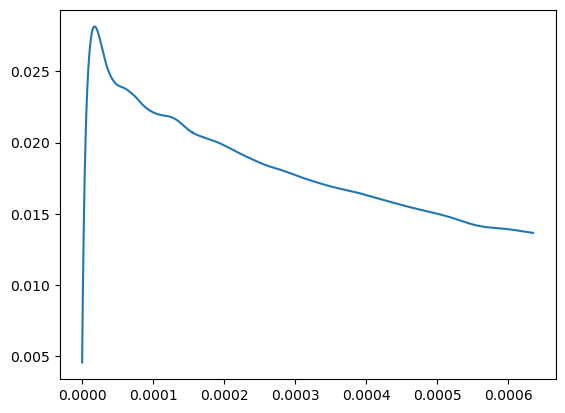

In [15]:
plt.plot(DF['Time'], DF['Cd'], label='C')

In [20]:
DF

,Time,Cd,Cd(f),Cd(r),Cl,Cl(f),Cl(r),CmPitch,CmRoll,CmYaw,Cs,Cs(f),Cs(r)
0,1.000000e-07,0.004572,0.002286,0.002286,0.000938,-0.001050,0.001989,-0.001520,-1.734803e-08,0.000002,9.751619e-07,0.000002,-0.000001
1,2.000000e-07,0.005133,0.002566,0.002566,0.001826,-0.002053,0.003879,-0.002966,-3.134485e-08,-0.000016,-6.790973e-06,-0.000020,0.000013
2,3.000000e-07,0.005675,0.002838,0.002838,0.002700,-0.003033,0.005733,-0.004383,-4.992311e-08,-0.000008,-2.852927e-06,-0.000010,0.000007
3,4.000000e-07,0.006195,0.003097,0.003098,0.003576,-0.004020,0.007596,-0.005808,-7.303385e-08,-0.000012,-4.280408e-06,-0.000014,0.000010
4,5.000000e-07,0.006698,0.003349,0.003349,0.004447,-0.005000,0.009447,-0.007223,-1.003580e-07,-0.000012,-3.825846e-06,-0.000014,0.000010
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2242,6.343000e-04,0.013664,0.006833,0.006832,0.017563,-0.022065,0.039628,-0.030846,5.734549e-07,0.000013,3.781697e-06,0.000014,-0.000011
2243,6.344000e-04,0.013664,0.006832,0.006831,0.017561,-0.022063,0.039624,-0.030844,5.733601e-07,0.000013,3.804718e-06,0.000014,-0.000011
2244,6.345000e-04,0.013663,0.006832,0.006831,0.017559,-0.022062,0.039621,-0.030841,5.732666e-07,0.000013,3.827694e-06,0.000015,-0.000011
2245,6.346000e-04,0.013662,0.006832,0.006831,0.017556,-0.022061,0.039617,-0.030839,5.731741e-07,0.000013,3.850620e-06,0.000015,-0.000011


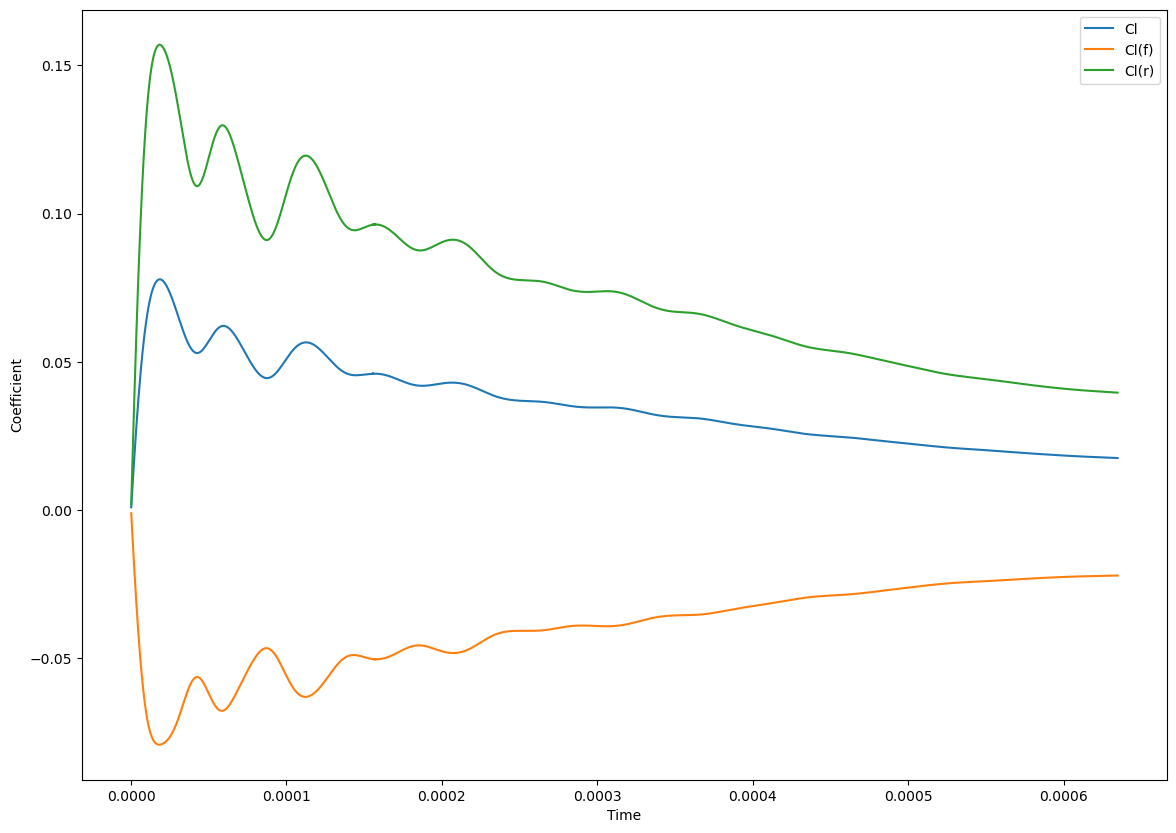

In [17]:
plt.figure(figsize=(14, 10))

for column in DF.columns:
    if "Cl" in column:
        plt.plot(DF['Time'], DF[column], label=column)

plt.xlabel('Time')
plt.ylabel('Coefficient')
plt.legend()

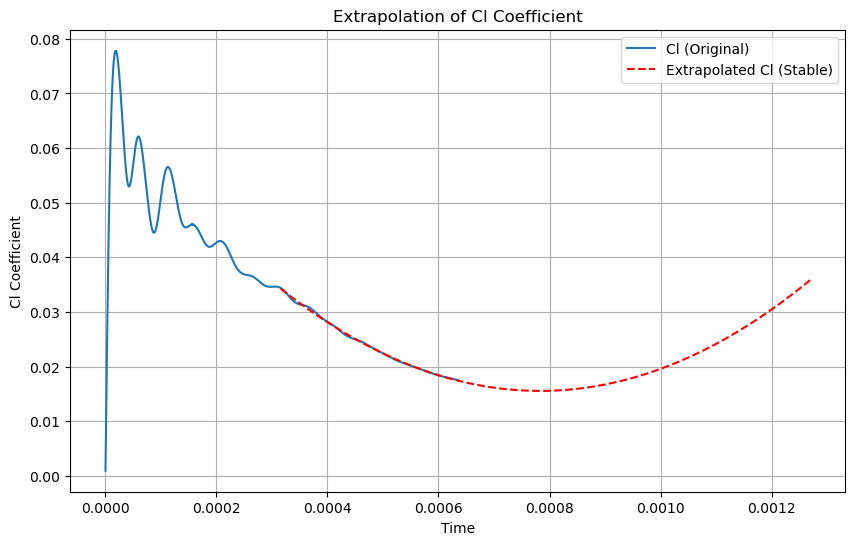

In [78]:
# Use the second half of the data
second_half = DF.iloc[len(DF) // 2 :]

# Define an exponential decay function for extrapolation
def decay_func(x, a, b, c):
    return (a*x**2 + b*x + c)

def decay_func1(x, a, b, c):
    return (a*x**2 + b*x + c) * np.heaviside(x,-b / (2 * a)) 

# Fit the decay function to the Cl data
time = second_half["Time"]
cl = second_half["Cl"]
params, _ = curve_fit(decay_func, time, cl, maxfev=4000)

# Predict stable value and generate the dotted line
stable_time = np.linspace(time.min(), time.max() * 2, 100)
stable_cl = decay_func1(stable_time, *params)

# Plot the original data and extrapolated curve
plt.figure(figsize=(10, 6))
plt.plot(DF["Time"], DF["Cl"], label="Cl (Original)")
plt.plot(stable_time, stable_cl, "--", label="Extrapolated Cl (Stable)", color="red")
plt.xlabel("Time")
plt.ylabel("Cl Coefficient")
plt.title("Extrapolation of Cl Coefficient")
plt.legend()
plt.grid()
plt.show()

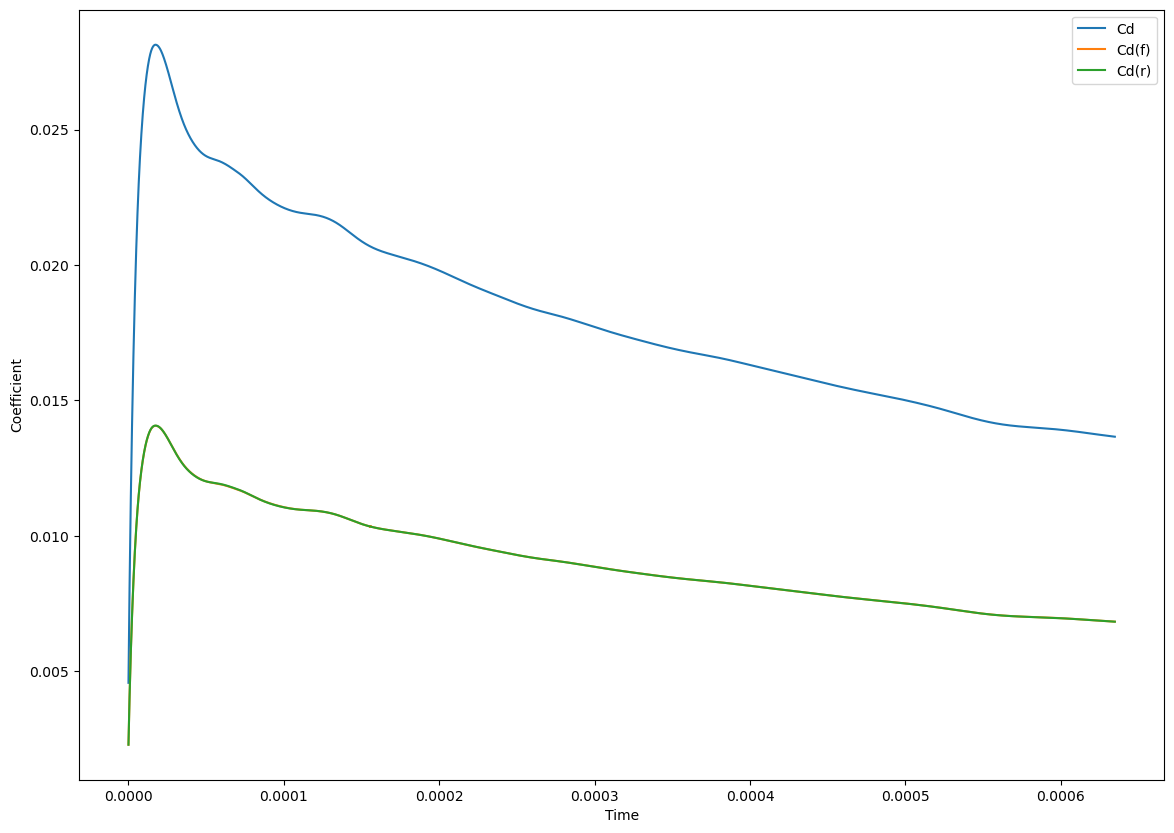

In [19]:
plt.figure(figsize=(14, 10))

for column in DF.columns:
    if "Cd" in column:
        plt.plot(DF['Time'], DF[column], label=column)

plt.xlabel('Time')
plt.ylabel('Coefficient')
plt.legend()

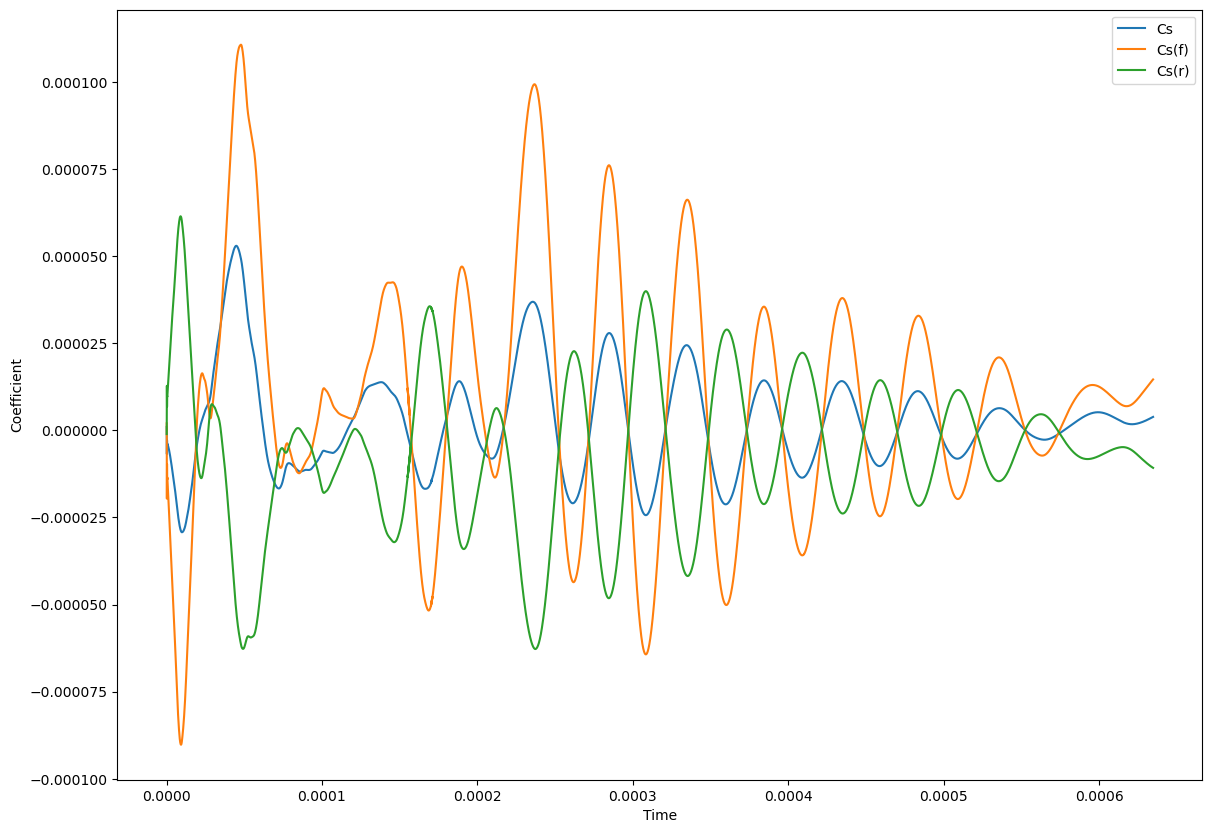

In [80]:
plt.figure(figsize=(14, 10))

for column in DF.columns:
    if "Cs" in column:
        plt.plot(DF['Time'], DF[column], label=column)

plt.xlabel('Time')
plt.ylabel('Coefficient')
plt.legend()

# V4

In [5]:
def process_all_dat_files(path, results_path=None):
    """
    Process and merge all .dat files from numbered subfolders in all subdirectories
    of the given postProcessing folder, prioritizing files with "_0.dat".
    
    Parameters:
    - postprocessing_folder: Path to the `postProcessing` directory.
    - results_path: Optional path to save the merged DataFrame as a CSV file.
    
    Returns:
    - merged_data: A pandas DataFrame containing the merged data.
    """
    if not os.path.exists(path):
        raise FileNotFoundError(f"No such folder: {path}")

    merged_data = pd.DataFrame()

    # Traverse all subdirectories in the postProcessing folder
    # Traverse numbered folders within each subdirectory
    numbered_folders = [f for f in os.listdir(path) if f.isdigit()]
    for folder in sorted(numbered_folders, key=int):  # Sort numerically
        folder_path = os.path.join(path, folder)

        if not os.path.isdir(folder_path):
            continue

        # Collect .dat files in the folder
        dat_files = [f for f in os.listdir(folder_path) if f.endswith(".dat")]

        # Prioritize files with "_0.dat"
        selected_files = {}
        for file in dat_files:
            base_name = file.replace("_0.dat", ".dat")  # Normalize the file name
            if base_name not in selected_files or "_0.dat" in file:
                selected_files[base_name] = file

        # Load and merge selected .dat files
        for file in selected_files.values():
            file_path = os.path.join(folder_path, file)
            try:
                df = load_dat(file_path,)  # Use the provided load_dat function
                df["subdir"] = path  # Add subdir for context
                df["time"] = int(folder)  # Add time (numeric folder name)
                merged_data = pd.concat([merged_data, df], ignore_index=True)
                print(f"Loaded {file_path}")
            except Exception as e:
                print(f"Failed to load {file_path}: {e}")

    # Optionally save the merged data
    if results_path:
        os.makedirs(results_path, exist_ok=True)
        output_file = os.path.join(results_path, "merged_postProcessing_data.csv")
        merged_data.to_csv(output_file, index=False)
        print(f"Merged data saved to {output_file}")

    return merged_data

In [7]:
solverInfo =process_all_dat_files("./DataV4/postProcessing/solverInfo")
solverInfo

Loaded ./DataV4/postProcessing/solverInfo/0/solverInfo_0.dat
Loaded ./DataV4/postProcessing/solverInfo/80/solverInfo.dat
Loaded ./DataV4/postProcessing/solverInfo/1280/solverInfo.dat


,Time,U_solver,Ux_initial,Ux_final,Ux_iters,Uy_initial,Uy_final,Uy_iters,Uz_initial,Uz_final,...,omega_final,omega_iters,omega_converged,p_solver,p_initial,p_final,p_iters,p_converged,subdir,time
0,1,GAMG,1.000000e+00,2.515878e-08,5,1.000000,5.213244e-08,5,1.000000,5.279561e-08,...,9.056155e-08,1,True,DICPBiCGStab,1.000000,0.009807,191,True,./DataV4/postProcessing/solverInfo,0
1,2,GAMG,7.959717e-03,6.592802e-09,3,0.397897,2.126443e-08,4,0.400232,2.546416e-08,...,5.178770e-08,1,True,DICPBiCGStab,0.004734,0.000029,176,True,./DataV4/postProcessing/solverInfo,0
2,3,GAMG,4.117413e-03,5.591172e-08,2,0.265873,1.436455e-08,4,0.267398,1.710988e-08,...,4.698886e-08,1,True,DICPBiCGStab,0.004729,0.000038,123,True,./DataV4/postProcessing/solverInfo,0
3,4,GAMG,2.029728e-03,2.771925e-08,2,0.171817,9.145857e-09,4,0.174670,1.090599e-08,...,5.244543e-08,1,True,DICPBiCGStab,0.006103,0.000047,158,True,./DataV4/postProcessing/solverInfo,0
4,5,GAMG,1.057510e-03,1.422845e-08,2,0.101926,7.155676e-08,3,0.104316,8.432852e-08,...,4.858153e-08,1,True,DICPBiCGStab,0.007953,0.000067,156,True,./DataV4/postProcessing/solverInfo,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2335,2286,GAMG,2.581207e-07,4.246781e-12,2,0.000380,6.373196e-11,3,0.000430,9.755459e-11,...,5.021049e-12,2,True,DICPBiCGStab,0.000163,0.000002,22,True,./DataV4/postProcessing/solverInfo,1280
2336,2287,GAMG,2.823689e-07,4.680240e-12,2,0.000399,7.150027e-11,3,0.000468,1.949564e-12,...,6.336653e-12,2,True,DICPBiCGStab,0.000173,0.000002,31,True,./DataV4/postProcessing/solverInfo,1280
2337,2288,GAMG,3.010396e-07,4.856774e-12,2,0.000631,4.695479e-12,4,0.000614,5.108048e-12,...,1.606163e-11,4,True,DICPBiCGStab,0.000189,0.000001,72,True,./DataV4/postProcessing/solverInfo,1280
2338,2289,GAMG,9.489966e-05,7.990621e-11,3,0.130276,7.236238e-12,5,0.116554,1.398969e-11,...,3.170875e-12,7,True,DICPBiCGStab,0.008716,0.000087,81,True,./DataV4/postProcessing/solverInfo,1280


Text(0.5, 1.0, 'Initial Residuals Over Time')

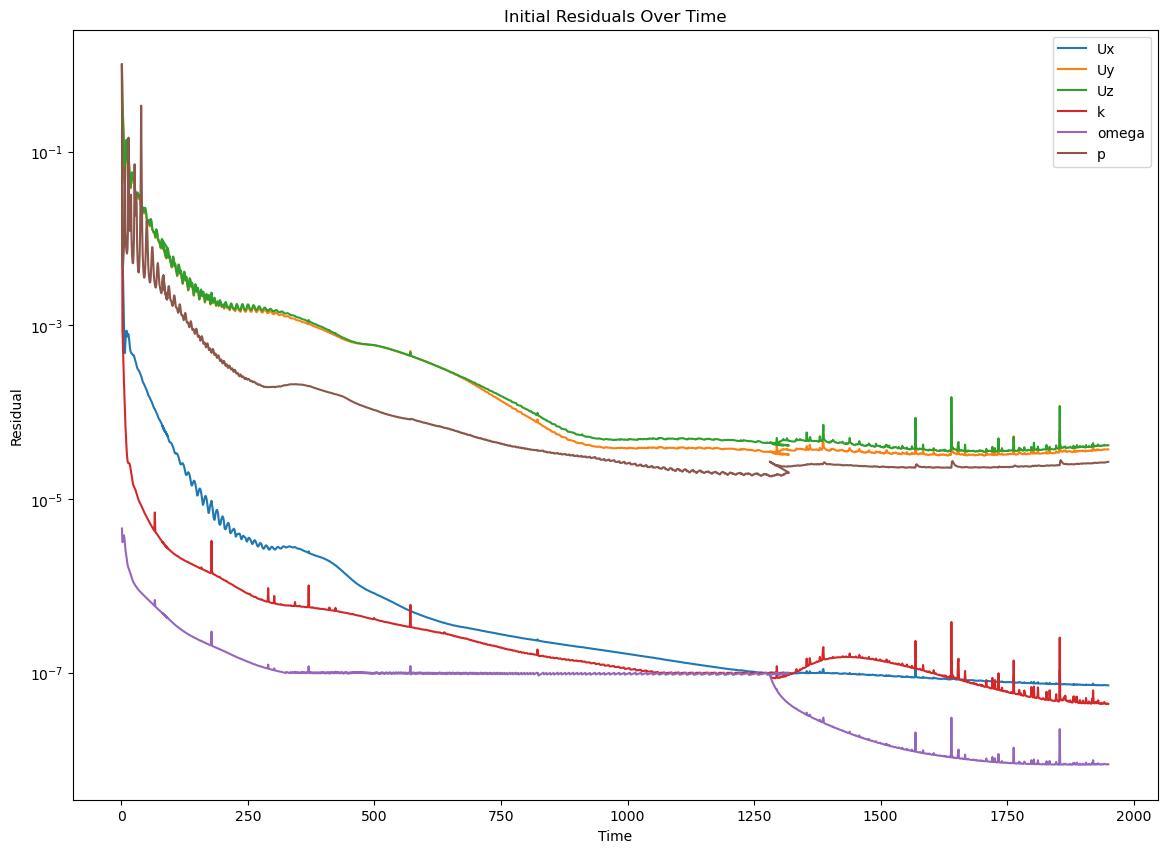

In [13]:
plt.figure(figsize=(14, 10))
for col in solverInfo.columns:
    if "initial" in col:
        plt.plot(solverInfo['Time'][:2000], solverInfo[col][:2000], label=col.replace("_initial", ""))

plt.xlabel('Time')
plt.ylabel('Residual')
plt.legend()
plt.yscale('log')
plt.title('Initial Residuals Over Time')

In [15]:
cd =process_all_dat_files("./DataV4/postProcessing/forceCoeffs")
cd[:2000]

Loaded ./DataV4/postProcessing/forceCoeffs/0/coefficient_0.dat
Loaded ./DataV4/postProcessing/forceCoeffs/80/coefficient.dat
Loaded ./DataV4/postProcessing/forceCoeffs/1280/coefficient.dat


,Time,Cd,Cd(f),Cd(r),Cl,Cl(f),Cl(r),CmPitch,CmRoll,CmYaw,Cs,Cs(f),Cs(r),subdir,time
0,1,5.781627,2.890816,2.890811,-0.005659,0.002780,-0.008439,0.005610,2.533975e-06,-0.000117,-0.000315,-0.000275,-0.000040,./DataV4/postProcessing/forceCoeffs,0
1,2,10.515450,5.257728,5.257721,-0.000435,-0.000245,-0.000190,-0.000027,3.585165e-06,-0.000100,-0.000321,-0.000261,-0.000060,./DataV4/postProcessing/forceCoeffs,0
2,3,10.901763,5.450884,5.450878,0.004078,-0.002711,0.006789,-0.004750,2.873168e-06,-0.000048,-0.000202,-0.000149,-0.000053,./DataV4/postProcessing/forceCoeffs,0
3,4,8.230793,4.115397,4.115395,0.007847,-0.004601,0.012448,-0.008525,1.078490e-06,-0.000026,-0.000109,-0.000080,-0.000029,./DataV4/postProcessing/forceCoeffs,0
4,5,3.807165,1.903581,1.903584,0.009829,-0.005402,0.015231,-0.010317,-1.328387e-06,-0.000028,-0.000085,-0.000070,-0.000015,./DataV4/postProcessing/forceCoeffs,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1946,0.243667,0.121833,0.121834,-0.000341,0.000189,-0.000530,0.000360,-3.289956e-07,0.000007,-0.000002,0.000006,-0.000008,./DataV4/postProcessing/forceCoeffs,1280
1996,1947,0.243642,0.121821,0.121821,-0.000341,0.000189,-0.000530,0.000360,-4.516167e-07,0.000011,0.000003,0.000013,-0.000010,./DataV4/postProcessing/forceCoeffs,1280
1997,1948,0.243619,0.121809,0.121810,-0.000339,0.000189,-0.000528,0.000359,-5.559785e-07,0.000016,0.000007,0.000019,-0.000012,./DataV4/postProcessing/forceCoeffs,1280
1998,1949,0.243596,0.121797,0.121799,-0.000336,0.000189,-0.000525,0.000357,-6.556540e-07,0.000019,0.000011,0.000025,-0.000014,./DataV4/postProcessing/forceCoeffs,1280


Text(0.5, 1.0, 'Cd Coefficients Over Time')

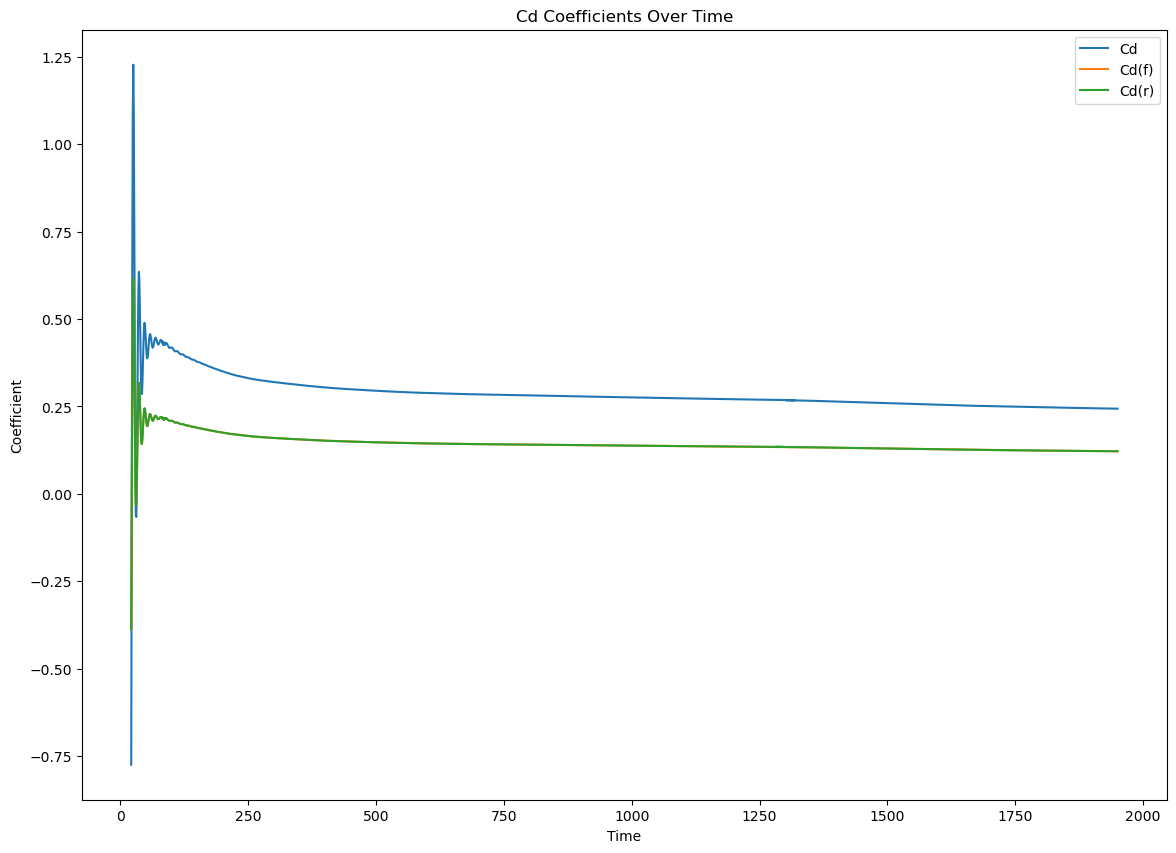

In [19]:
plt.figure(figsize=(14, 10))

lastskip = 20
for column in cd.columns:
    if "Cd" in column:
        plt.plot(cd['Time'][20:2000], cd[column][20:2000], label=column)

plt.xlabel('Time')
plt.ylabel('Coefficient')
plt.legend()
plt.title('Cd Coefficients Over Time')

In [47]:
cd.columns

Index(['Time', 'Cd', 'Cd(f)', 'Cd(r)', 'Cl', 'Cl(f)', 'Cl(r)', 'CmPitch',
       'CmRoll', 'CmYaw', 'Cs', 'Cs(f)', 'Cs(r)', 'subdir', 'time'],
      dtype='object')

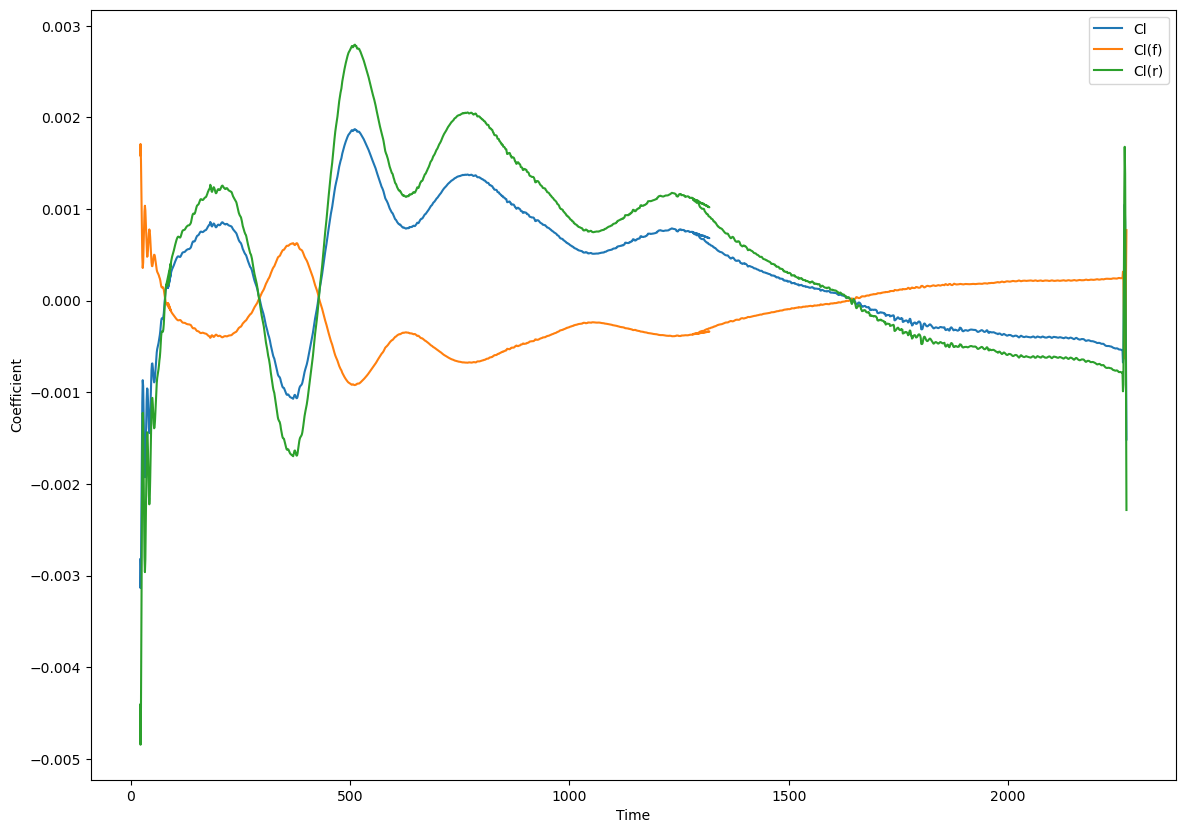

In [48]:
plt.figure(figsize=(14, 10))

lastskip = 20
for column in cd.columns:
    if "Cl" in column:
        plt.plot(cd['Time'][lastskip:-lastskip], cd[column][lastskip:-lastskip], label=column)

plt.xlabel('Time')
plt.ylabel('Coefficient')
plt.legend()

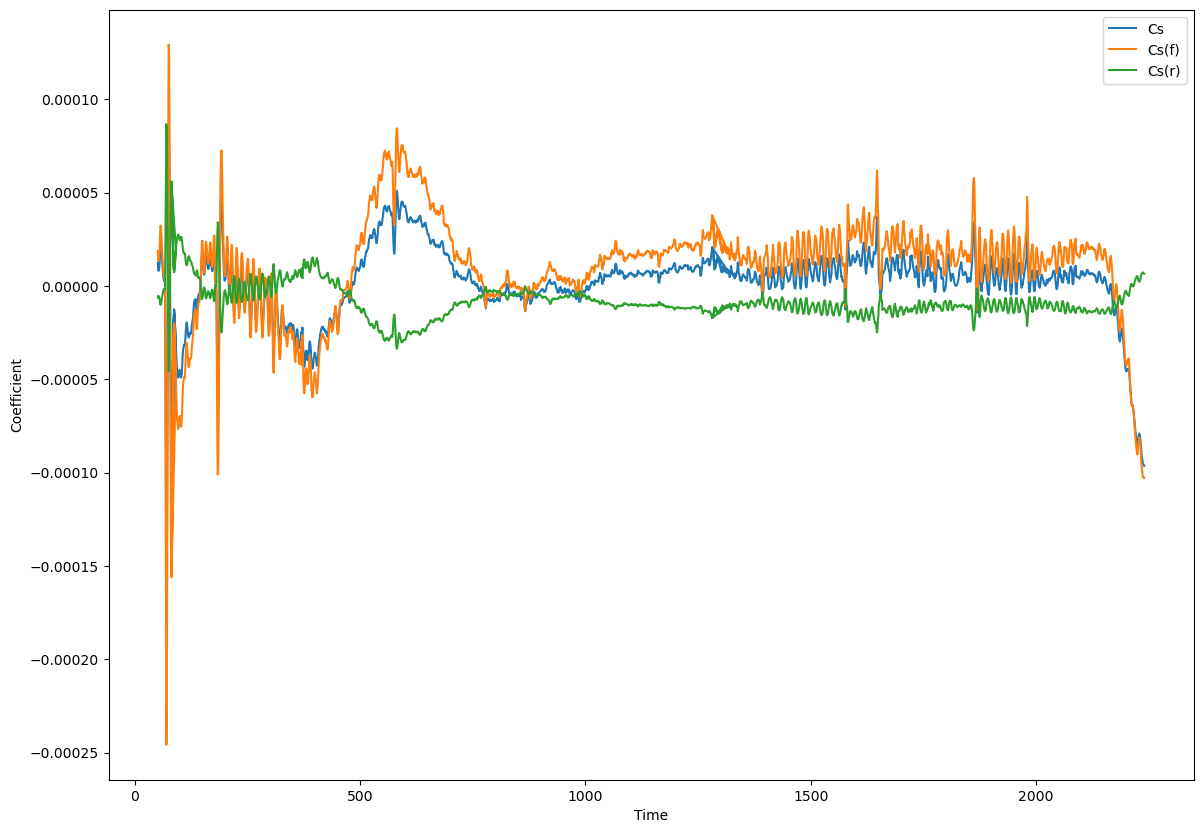

In [50]:
plt.figure(figsize=(14, 10))

lastskip = 50
for column in cd.columns:
    if "Cs" in column:
        plt.plot(cd['Time'][lastskip:-lastskip], cd[column][lastskip:-lastskip], label=column)

plt.xlabel('Time')
plt.ylabel('Coefficient')
plt.legend()

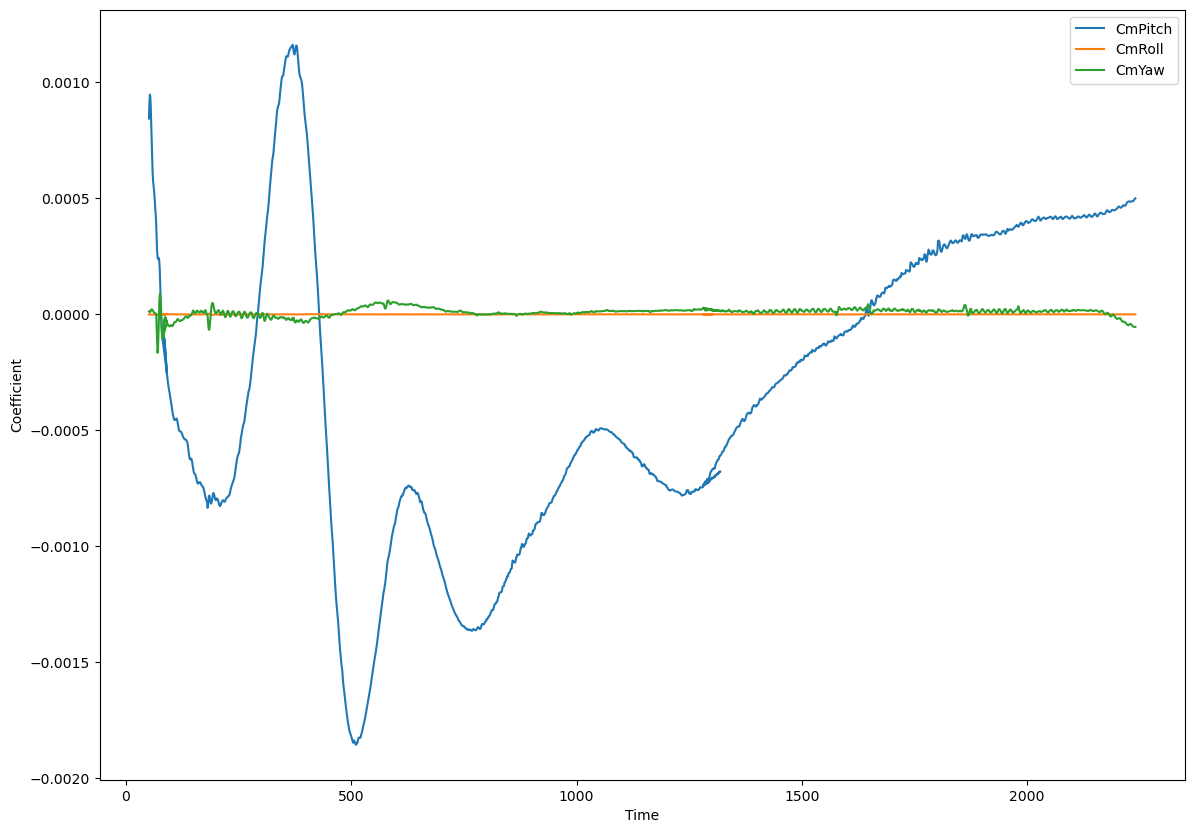

In [54]:
plt.figure(figsize=(14, 10))

lastskip = 50
for column in cd.columns:
    if "Cm" in column:
        plt.plot(cd['Time'][lastskip:-lastskip], cd[column][lastskip:-lastskip], label=column)

plt.xlabel('Time')
plt.ylabel('Coefficient')
plt.legend()

In [45]:
cd[:-20]

,Time,Cd,Cd(f),Cd(r),Cl,Cl(f),Cl(r),CmPitch,CmRoll,CmYaw,Cs,Cs(f),Cs(r),subdir,time
0,1,5.781627,2.890816,2.890811,-0.005659,0.002780,-0.008439,0.005610,0.000003,-0.000117,-0.000315,-0.000275,-0.000040,./DataV4/postProcessing/forceCoeffs,0
1,2,10.515450,5.257728,5.257721,-0.000435,-0.000245,-0.000190,-0.000027,0.000004,-0.000100,-0.000321,-0.000261,-0.000060,./DataV4/postProcessing/forceCoeffs,0
2,3,10.901763,5.450884,5.450878,0.004078,-0.002711,0.006789,-0.004750,0.000003,-0.000048,-0.000202,-0.000149,-0.000053,./DataV4/postProcessing/forceCoeffs,0
3,4,8.230793,4.115397,4.115395,0.007847,-0.004601,0.012448,-0.008525,0.000001,-0.000026,-0.000109,-0.000080,-0.000029,./DataV4/postProcessing/forceCoeffs,0
4,5,3.807165,1.903581,1.903584,0.009829,-0.005402,0.015231,-0.010317,-0.000001,-0.000028,-0.000085,-0.000070,-0.000015,./DataV4/postProcessing/forceCoeffs,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2315,2266,0.241338,0.120680,0.120659,0.001049,-0.000629,0.001679,-0.001154,0.000011,-0.002600,-0.002516,-0.003858,0.001342,./DataV4/postProcessing/forceCoeffs,1280
2316,2267,0.241077,0.120545,0.120532,0.000858,-0.000525,0.001383,-0.000954,0.000006,-0.002459,-0.002386,-0.003652,0.001266,./DataV4/postProcessing/forceCoeffs,1280
2317,2268,0.239945,0.119971,0.119974,0.000166,-0.000149,0.000316,-0.000232,-0.000002,-0.001561,-0.001541,-0.002331,0.000791,./DataV4/postProcessing/forceCoeffs,1280
2318,2269,0.238413,0.119196,0.119216,-0.000745,0.000347,-0.001091,0.000719,-0.000010,-0.000255,-0.000307,-0.000408,0.000102,./DataV4/postProcessing/forceCoeffs,1280


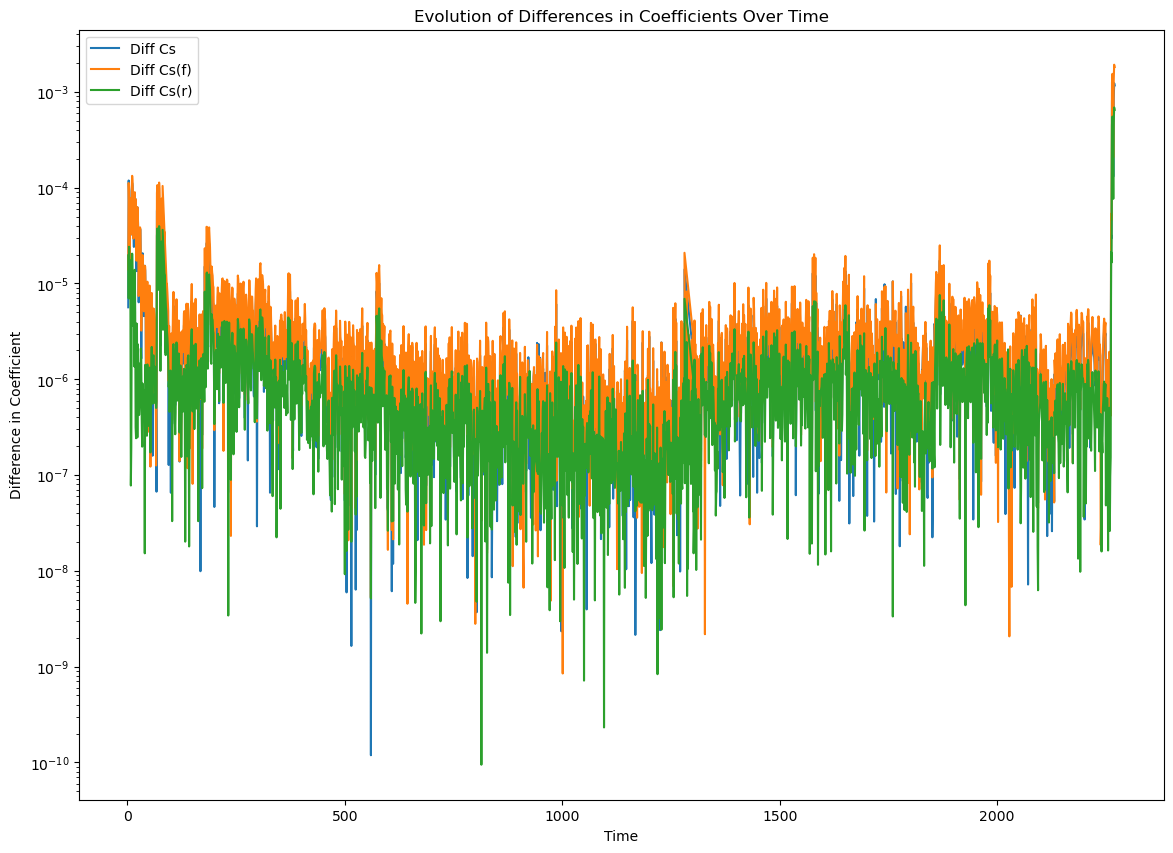

In [56]:
skip = 100

df = cd[:-20]
# Calculate the difference for each "Cd" column
plt.figure(figsize=(14, 10))
for column in df.columns:
    if "Cs" in column:
        diff_values = np.abs(np.diff(df[column]))
        plt.plot(df['Time'][1:], diff_values, label=f"Diff {column}")

plt.xlabel('Time')
plt.ylabel('Difference in Coefficient')
plt.legend()
plt.yscale('log')
plt.title('Evolution of Differences in Coefficients Over Time')
plt.show()

In [30]:
def load_forces_and_momentum(path, results_path=None):
    """
    Process and merge all .dat files from numbered subfolders in the given directory,
    separating files with "forces" and "momentum" in their names.

    Parameters:
    - path: Path to the directory containing numbered folders.
    - results_path: Optional path to save the merged DataFrames as CSV files.

    Returns:
    - forces_data: A pandas DataFrame containing merged "forces" data.
    - momentum_data: A pandas DataFrame containing merged "momentum" data.
    """
    if not os.path.exists(path):
        raise FileNotFoundError(f"No such folder: {path}")

    forces_data = pd.DataFrame()
    momentum_data = pd.DataFrame()

    # Traverse numbered folders within the directory
    numbered_folders = [f for f in os.listdir(path) if f.isdigit()]
    for folder in sorted(numbered_folders, key=int):  # Sort numerically
        folder_path = os.path.join(path, folder)

        if not os.path.isdir(folder_path):
            continue

        # Collect .dat files in the folder
        dat_files = [f for f in os.listdir(folder_path) if f.endswith(".dat")]

        # Prioritize files with "_0.dat"
        selected_files = {}
        for file in dat_files:
            base_name = file.replace("_0.dat", ".dat")  # Normalize the file name
            if base_name not in selected_files or "_0.dat" in file:
                selected_files[base_name] = file

        # Load and merge selected .dat files into respective DataFrames
        for file in selected_files.values():
            file_path = os.path.join(folder_path, file)
            try:
                df = load_dat(file_path)  # Use the provided load_dat function
                df["folder"] = folder  # Add folder (numeric folder name) for context

                if "force" in file.lower():
                    forces_data = pd.concat([forces_data, df], ignore_index=True)
                elif "moment" in file.lower():
                    momentum_data = pd.concat([momentum_data, df], ignore_index=True)

                print(f"Loaded {file_path}")
            except Exception as e:
                print(f"Failed to load {file_path}: {e}")

    # Optionally save the merged data
    if results_path:
        os.makedirs(results_path, exist_ok=True)
        if not forces_data.empty:
            forces_output = os.path.join(results_path, "merged_forces_data.csv")
            forces_data.to_csv(forces_output, index=False)
            print(f"Forces data saved to {forces_output}")
        if not momentum_data.empty:
            momentum_output = os.path.join(results_path, "merged_momentum_data.csv")
            momentum_data.to_csv(momentum_output, index=False)
            print(f"Momentum data saved to {momentum_output}")

    return forces_data, momentum_data


In [32]:
forces,moment =load_forces_and_momentum("./DataV4/postProcessing/forces")


Loaded ./DataV4/postProcessing/forces/0/moment_0.dat
Loaded ./DataV4/postProcessing/forces/0/force_0.dat
Loaded ./DataV4/postProcessing/forces/80/moment.dat
Loaded ./DataV4/postProcessing/forces/80/force.dat
Loaded ./DataV4/postProcessing/forces/1280/moment.dat
Loaded ./DataV4/postProcessing/forces/1280/force.dat


In [33]:
moment

,Time,total_x,total_y,total_z,pressure_x,pressure_y,pressure_z,viscous_x,viscous_y,viscous_z,folder
0,1,3.160504e-03,-1.461131e-01,-6.996328e+00,3.160271e-03,-1.460405e-01,-7.013819e+00,2.325486e-07,-7.254865e-05,1.749129e-02,0
1,2,4.471580e-03,-1.251127e-01,3.403316e-02,4.472828e-03,-1.250387e-01,1.330074e-02,-1.247589e-06,-7.406046e-05,2.073242e-02,0
2,3,3.583556e-03,-5.965686e-02,5.924362e+00,3.586397e-03,-5.958141e-02,5.899960e+00,-2.841138e-06,-7.545148e-05,2.440237e-02,0
3,4,1.345178e-03,-3.180389e-02,1.063228e+01,1.349471e-03,-3.174896e-02,1.060544e+01,-4.292562e-06,-5.492403e-05,2.684294e-02,0
4,5,-1.656754e-03,-3.468778e-02,1.286721e+01,-1.651275e-03,-3.471809e-02,1.284087e+01,-5.479086e-06,3.031021e-05,2.633324e-02,0
...,...,...,...,...,...,...,...,...,...,...,...
2335,2286,5.975061e-02,-1.191023e+00,1.683334e+00,5.976025e-02,-1.174509e+00,1.596249e+00,-9.640393e-06,-1.651304e-02,8.708550e-02,1280
2336,2287,1.963478e-01,4.132767e+00,3.246219e+00,1.963209e-01,4.148078e+00,3.158905e+00,2.688955e-05,-1.531071e-02,8.731395e-02,1280
2337,2288,1.418480e+01,5.003419e+02,1.670847e+02,1.418169e+01,5.000811e+02,1.670806e+02,3.114214e-03,2.608493e-01,4.058288e-03,1280
2338,2289,-1.339796e+05,2.770864e+06,-4.401022e+06,-2.260929e+05,1.038380e+07,-1.108177e+07,9.211335e+04,-7.612933e+06,6.680750e+06,1280


In [39]:
forces[:2000]

,Time,total_x,total_y,total_z,pressure_x,pressure_y,pressure_z,viscous_x,viscous_y,viscous_z,folder
0,1,2403.674470,-2.352637,0.130919,2374.346577,-2.352553,0.130919,29.327893,-0.000083,-2.354915e-07,0
1,2,4371.730903,-0.180894,0.133264,4342.484157,-0.181866,0.133259,29.246746,0.000972,5.070133e-06,0
2,3,4532.338098,1.695385,0.083826,4503.208300,1.693213,0.083816,29.129798,0.002172,1.005211e-05,0
3,4,3421.899494,3.262203,0.045161,3392.898370,3.259229,0.045154,29.001124,0.002975,7.058253e-06,0
4,5,1582.804509,4.086389,0.035439,1553.918508,4.083562,0.035456,28.886001,0.002828,-1.704580e-05,0
...,...,...,...,...,...,...,...,...,...,...,...
1995,1946,101.303055,-0.141796,0.000881,38.457550,-0.169465,0.000868,62.845505,0.027668,1.300812e-05,1280
1996,1947,101.292635,-0.141748,-0.001120,38.454065,-0.169416,-0.001134,62.838570,0.027668,1.386613e-05,1280
1997,1948,101.282964,-0.141044,-0.002923,38.451317,-0.168714,-0.002937,62.831647,0.027670,1.394732e-05,1280
1998,1949,101.273389,-0.139850,-0.004505,38.448661,-0.167519,-0.004519,62.824728,0.027670,1.358598e-05,1280


In [47]:
forces.columns

Index(['Time', 'total_x', 'total_y', 'total_z', 'pressure_x', 'pressure_y',
       'pressure_z', 'viscous_x', 'viscous_y', 'viscous_z', 'folder'],
      dtype='object')

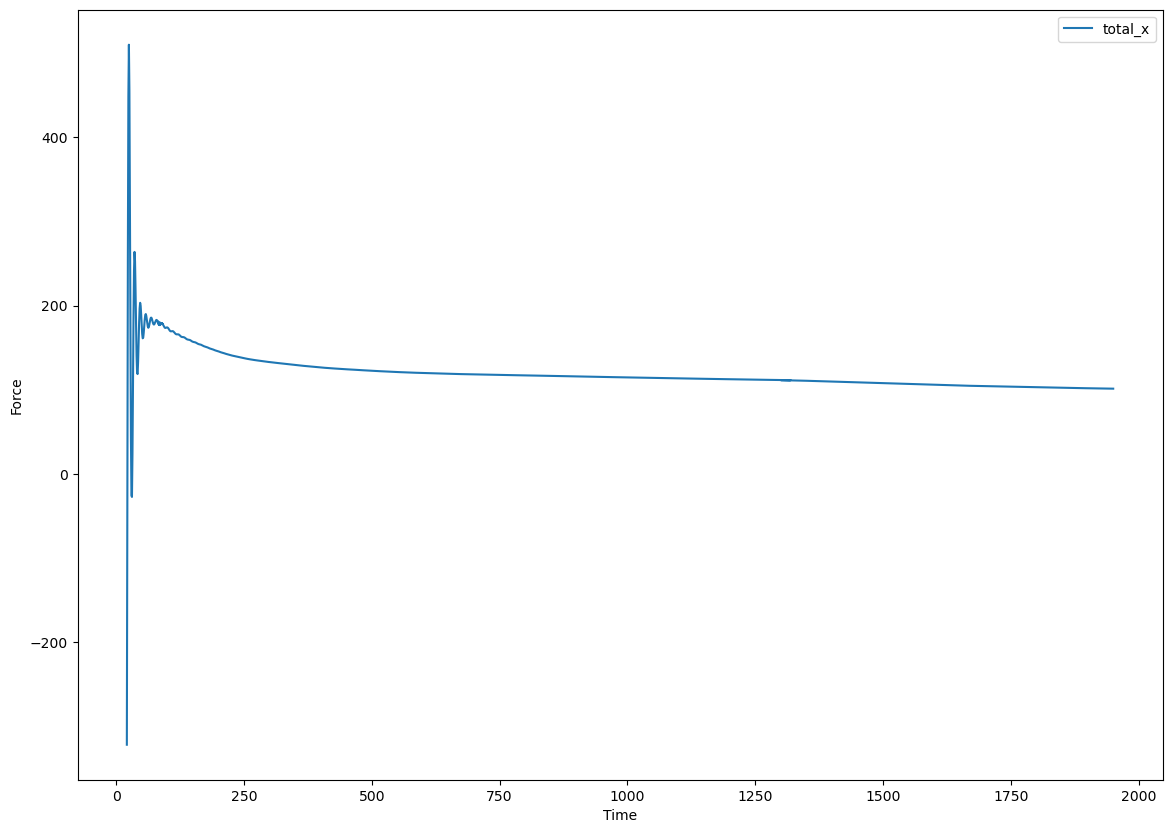

In [44]:
plt.figure(figsize=(14, 10))

skip = 2000
column = 'total_x'

plt.plot(forces['Time'][20:skip], forces[column][20:skip], label=column)

plt.xlabel('Time')
plt.ylabel('Force')
plt.legend()

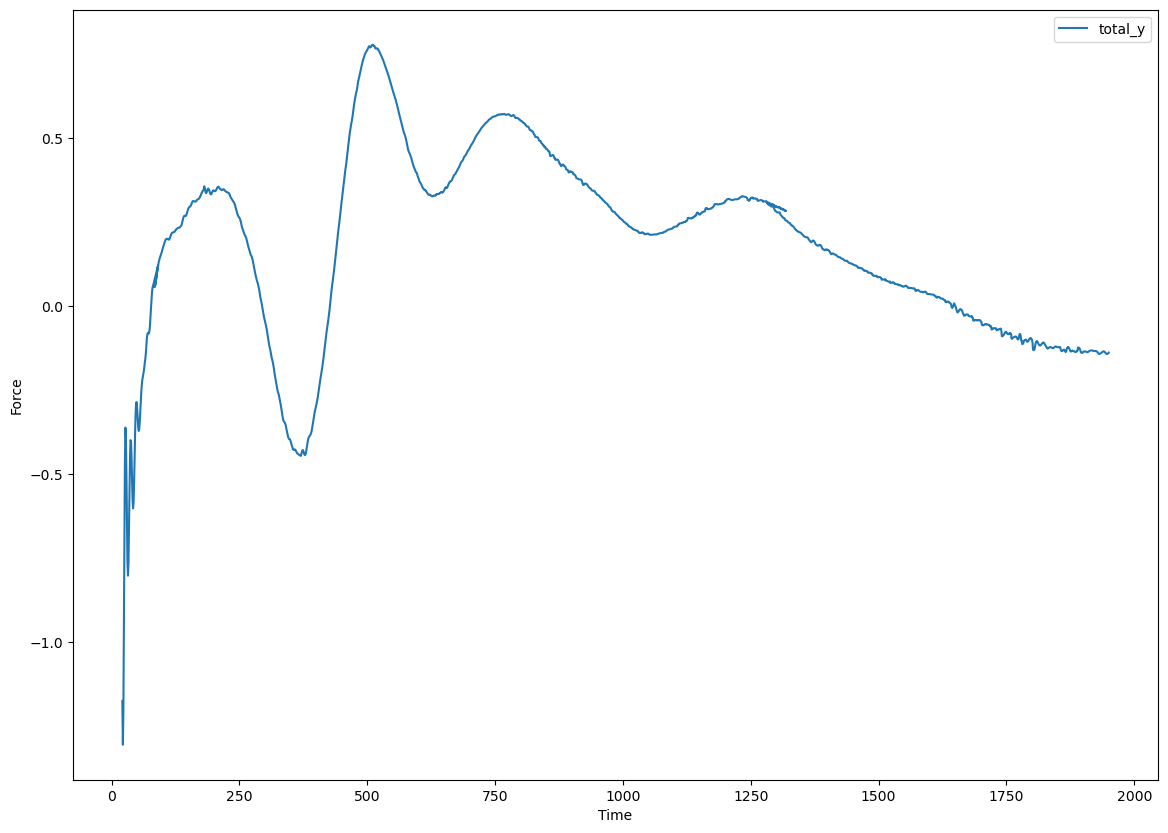

In [45]:
plt.figure(figsize=(14, 10))

skip = 2000
column = 'total_y'

plt.plot(forces['Time'][20:skip], forces[column][20:skip], label=column)

plt.xlabel('Time')
plt.ylabel('Force')
plt.legend()

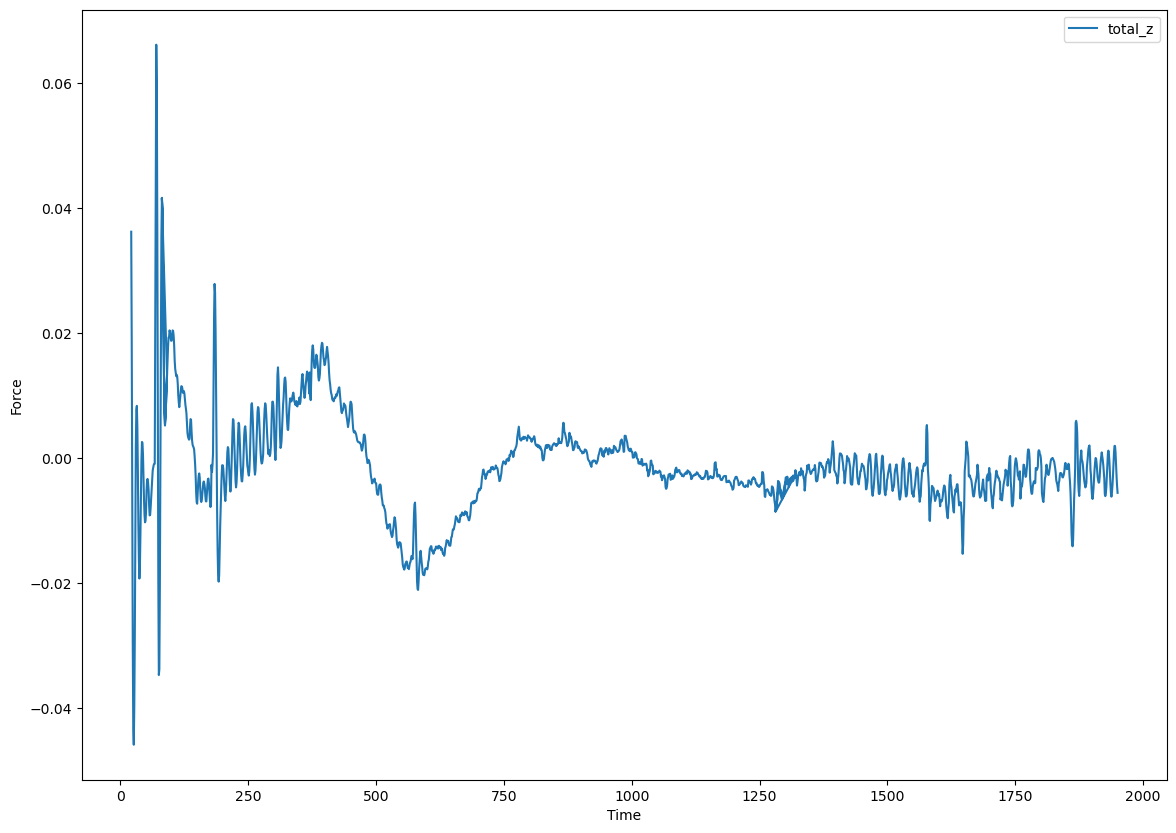

In [46]:
plt.figure(figsize=(14, 10))

skip = 2000
column = 'total_z'

plt.plot(forces['Time'][20:skip], forces[column][20:skip], label=column)

plt.xlabel('Time')
plt.ylabel('Force')
plt.legend()

In [48]:
def compute_center_of_pressure(pressure_df, momentum_df):
    """
    Computes the Center of Pressure (CoP) in x, y, and z directions from pressure and momentum DataFrames.

    Parameters:
    - pressure_df (pd.DataFrame): DataFrame containing pressure forces.
    - momentum_df (pd.DataFrame): DataFrame containing pressure moments.

    Returns:
    - cop_df (pd.DataFrame): DataFrame containing the computed Center of Pressure (CoP) over time.
    """
    # Ensure the DataFrames are sorted by time and aligned
    pressure_df = pressure_df.sort_values(by="Time").reset_index(drop=True)
    momentum_df = momentum_df.sort_values(by="Time").reset_index(drop=True)

    # Align DataFrames by Time
    if not pressure_df["Time"].equals(momentum_df["Time"]):
        raise ValueError("Time columns in pressure and momentum DataFrames do not match.")

    # Compute Center of Pressure (CoP)
    cop_x = momentum_df["pressure_y"] / pressure_df["total_z"]  # CoP_x
    cop_y = momentum_df["pressure_z"] / pressure_df["total_x"]  # CoP_y
    cop_z = momentum_df["pressure_x"] / pressure_df["total_y"]  # CoP_z

    # Handle division by zero (e.g., when forces are zero)
    cop_x.replace([float('inf'), -float('inf')], float('nan'), inplace=True)
    cop_y.replace([float('inf'), -float('inf')], float('nan'), inplace=True)
    cop_z.replace([float('inf'), -float('inf')], float('nan'), inplace=True)

    # Combine into a result DataFrame
    cop_df = pd.DataFrame({
        "Time": pressure_df["Time"],
        "CoP_x": cop_x,
        "CoP_y": cop_y,
        "CoP_z": cop_z
    })

    return cop_df

In [50]:
CoP = compute_center_of_pressure(forces, moment)
CoP

,Time,CoP_x,CoP_y,CoP_z
0,1,-1.115506e+00,-2.917957e-03,-1.343289e-03
1,2,-9.382801e-01,3.042443e-06,-2.472629e-02
2,3,-7.107715e-01,1.301748e-03,2.115388e-03
3,4,-7.030106e-01,3.099283e-03,4.136685e-04
4,5,-9.796469e-01,8.112735e-03,-4.040913e-04
...,...,...,...,...
2335,2286,-3.052545e+00,1.598891e-02,1.133609e-01
2336,2287,-3.121443e+00,3.202845e-02,1.828024e-01
2337,2288,-3.106530e+00,-1.343756e+01,2.439964e-01
2338,2289,-1.350329e+01,3.227458e+00,1.647690e-01


In [59]:
CoP[1970:2000]

,Time,CoP_x,CoP_y,CoP_z
1970,1921,-33.486567,-0.004944,0.003033
1971,1922,-11.802497,-0.004937,0.004049
1972,1923,-7.158877,-0.004934,0.005145
1973,1924,-5.834584,-0.004936,0.005824
1974,1925,-4.179308,-0.004921,0.006686
1975,1926,-4.190610,-0.004942,0.006851
1976,1927,-4.362769,-0.004961,0.006637
1977,1928,-4.831341,-0.004995,0.005573
1978,1929,-6.128106,-0.005046,0.004002
1979,1930,-11.619720,-0.005086,0.002744


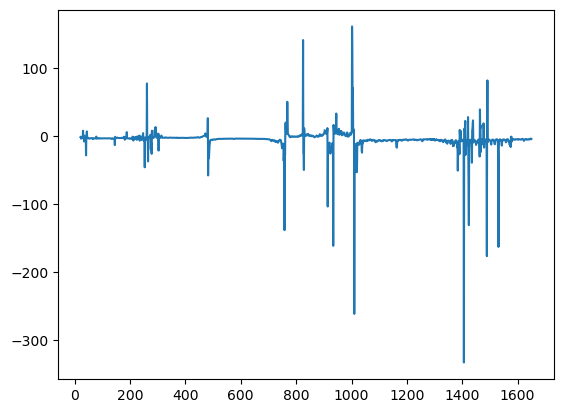

In [53]:
plt.plot(CoP['Time'][20:1700], CoP['CoP_x'][20:1700], label='CoP_x')

Text(0, 0.5, 'Center of Pressure y')

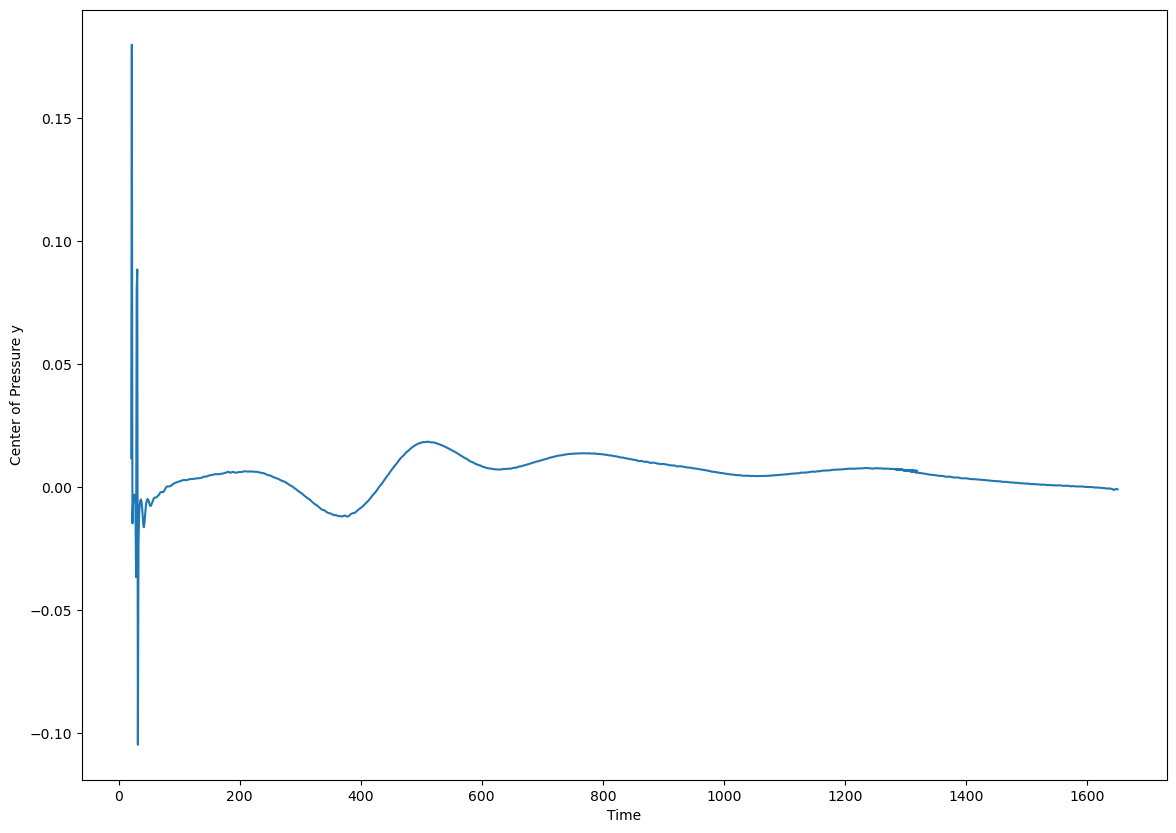

In [58]:
plt.figure(figsize=(14, 10))
plt.plot(CoP['Time'][20:1700], CoP['CoP_y'][20:1700], label='CoP_y')
plt.xlabel('Time')
plt.ylabel('Center of Pressure y')

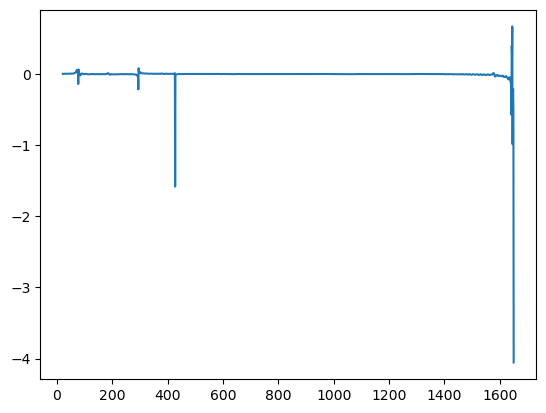

In [55]:
plt.plot(CoP['Time'][20:1700], CoP['CoP_z'][20:1700], label='CoP_z')
